# Initialize

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import math

Metal device set to: Apple M1 Pro


2023-03-22 15:34:14.076865: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-22 15:34:14.076981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
import classy_sz
classy_sz.__file__

'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

In [19]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [8.0,8.0]


# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

# Parameters 

Important: Planck 2014/ McCarthy et al. use Planck 2014 cosmology (https://arxiv.org/pdf/1303.5076.pdf, best-fit)

In [1]:
# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    
}



# # parameters for Cosmology Planck 14, https://arxiv.org/pdf/1303.5076.pdf, best-fit
p14_dict={}
p14_dict['Omega_cdm'] = 0.3175-0.022068/0.6711/0.6711
p14_dict['omega_b'] = 0.022068
p14_dict['h'] = 0.6711
p14_dict['A_s'] = 2.2e-9
p14_dict['n_s'] = .9624
p14_dict['k_pivot'] = 0.05
p14_dict['tau_reio'] = 0.0925

p14_dict['N_ncdm'] = 1
p14_dict['N_ur'] = 0.00641
p14_dict['deg_ncdm'] = 3
p14_dict['m_ncdm'] = 0.02
p14_dict['T_ncdm'] = 0.71611



# Boris benchmark
p_dict = {}
p_dict['mass function'] = 'T10'
p_dict['concentration parameter'] = 'D08'
p_dict['delta for cib'] = '200m'
p_dict['hm_consistency'] = 1
p_dict['damping_1h_term'] = 0

# mass bounds
p_dict['M_min'] = 1e8*p14_dict['h'] # was M_min_cib
p_dict['M_max'] = 1e16*p14_dict['h'] # was M_max_cib
# redshift bounds
p_dict['z_min'] = 0.07
p_dict['z_max'] = 6. # fiducial for MM20 : 6
p_dict['freq_min'] = 10.
p_dict['freq_max'] = 5e4 # fiducial for MM20 : 6

# HOD parameters for CIB
p_dict['M_min_HOD'] = pow(10.,10)  # was M_min_HOD_cib
#p_dict['M1_prime_HOD'] =pow(10.,125.1536196)*p_dict['h']


# CIB parametes see McCarthy & Madhavacheril 2020
p_dict['Redshift evolution of dust temperature'] =  0.36
p_dict['Dust temperature today in Kelvins'] = 24.4
p_dict['Emissivity index of sed'] = 1.75
p_dict['Power law index of SED at high frequency'] = 1.7
p_dict['Redshift evolution of L − M normalisation'] = 3.6
p_dict['Most efficient halo mass in Msun'] = pow(10.,12.6)
p_dict['Normalisation of L − M relation in [Jy MPc2/Msun]'] = 6.4e-8
p_dict['Size of of halo masses sourcing CIB emission'] = 0.5

# precision parameters
p_dict['pressure_profile_epsabs'] = 1.e-8
p_dict['pressure_profile_epsrel'] = 1.e-3
# precision for redshift integal
p_dict['redshift_epsabs'] = 1e-40#1.e-40
p_dict['redshift_epsrel'] = 1e-4#1.e-10 # fiducial value 1e-8
# precision for mass integal
p_dict['mass_epsabs'] = 1e-40 #1.e-40
p_dict['mass_epsrel'] = 1e-4#1e-10
# precision for Luminosity integral (sub-halo mass function)
p_dict['L_sat_epsabs'] = 1e-40 #1.e-40
p_dict['L_sat_epsrel'] = 1e-3#1e-10

p_dict['z_max_pk'] = p_dict['z_max']

# multipole array
p_dict['dell'] = 30
p_dict['ell_max'] = 8000.
p_dict['ell_min'] = 2.


# Select frequencies 

In [140]:
nu_list = 217,353,545
nu_list_str = '217,353,545'

## Flux cut 

In [141]:
# flux cut values

cib_flux = {}
# Planck flux cut, Table 1 in https://arxiv.org/pdf/1309.0382.pdf
cib_flux['100'] = 400
cib_flux['143'] = 350
cib_flux['217'] = 225
cib_flux['353'] = 315
cib_flux['545'] = 350
cib_flux['857'] = 710
cib_flux['3000'] = 1000
#SO, from SO foreacst
cib_flux['93'] = 7
cib_flux['145'] = 15
cib_flux['225'] = 20
cib_flux['280'] = 25
#CCAT prime, McCarthy et al.'s' assumptions
# cib_flux['93'] = 400
# cib_flux['145'] = 350
# cib_flux['225'] = 225
# cib_flux['220'] = 225
# cib_flux['280'] = 225
# cib_flux['350'] = 315
# cib_flux['550'] = 350
# cib_flux['545'] = 350
# cib_flux['850'] = 710

def make_flux_cut_list(cib_flux_dict, nu_list):
    """
    Make a string of flux cut values for given frequency list to pass into class_sz
    Beware: if frequency not in the flux_cut dictionary, it assigns 0
    """
    cib_flux_list = []
    keys = list(cib_flux.keys())
    for i,nu in enumerate(nu_list):
        if str(nu) in keys:
            cib_flux_list.append(cib_flux[str(nu)])
        else:
            cib_flux_list.append(0)
    return cib_flux_list

cib_flux_list = make_flux_cut_list(cib_flux, nu_list)

# Compute CIB auto 

In [ ]:
%%time
#Planck 2014/ McCarthy et al. 
N = Class()
N.set(p14_dict)
N.set(p_dict)

N.set({# class_sz parameters:
        'output':'cib_cib_1h,cib_cib_2h,dcib0dz',
        'class_sz_verbose':0,
        
        'cib_frequency_list_num' : len(nu_list),
        'cib_frequency_list_in_GHz' : nu_list_str,  
        'cib_Snu_cutoff_list [mJy]': str(list(cib_flux_list))[1:-1],
        'has_cib_flux_cut': 1
        })
        
N.compute()

In [50]:
cib = N.cl_cib_cib()

# cib_1h = np.asarray(cib[str(nu_list[0])+'x'+str(nu_list[0])]['1h']) 
# cib_2h = np.asarray(cib[str(nu_list[0])+'x'+str(nu_list[0])]['2h'])
ell_cib = np.asarray(cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])

# Compare with other codes 

In [51]:
# data MM2020 (obtained from the authors) https://arxiv.org/pdf/2010.16405.pdf
# in class_sz/sz_auxilliary folder 

path_to_class = '/Users/aleksandra/software/class_sz/'
def read_fiona_auto(freq, path_to_class):
    L_ref_1h = np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_1h_'+str(int(freq))+'x'+str(int(freq))+'.txt')
    ell_MM20 = L_ref_1h[:,0]
    cib_1h_MM20 = L_ref_1h[:,1]
    L_ref_2h= np.loadtxt(path_to_class + 'sz_auxiliary_files/cib_files/cib_2h_'+str(int(freq))+'x'+str(int(freq))+'.txt')
    cib_2h_MM20 = L_ref_2h[:,1]
    return ell_MM20, cib_1h_MM20, cib_2h_MM20 

ell_MM20_217, cib_1h_MM20_217, cib_2h_MM20_217 = read_fiona_auto(217, path_to_class)
ell_MM20_353, cib_1h_MM20_353, cib_2h_MM20_353 = read_fiona_auto(353, path_to_class)
ell_MM20_545, cib_1h_MM20_545, cib_2h_MM20_545 = read_fiona_auto(545, path_to_class)

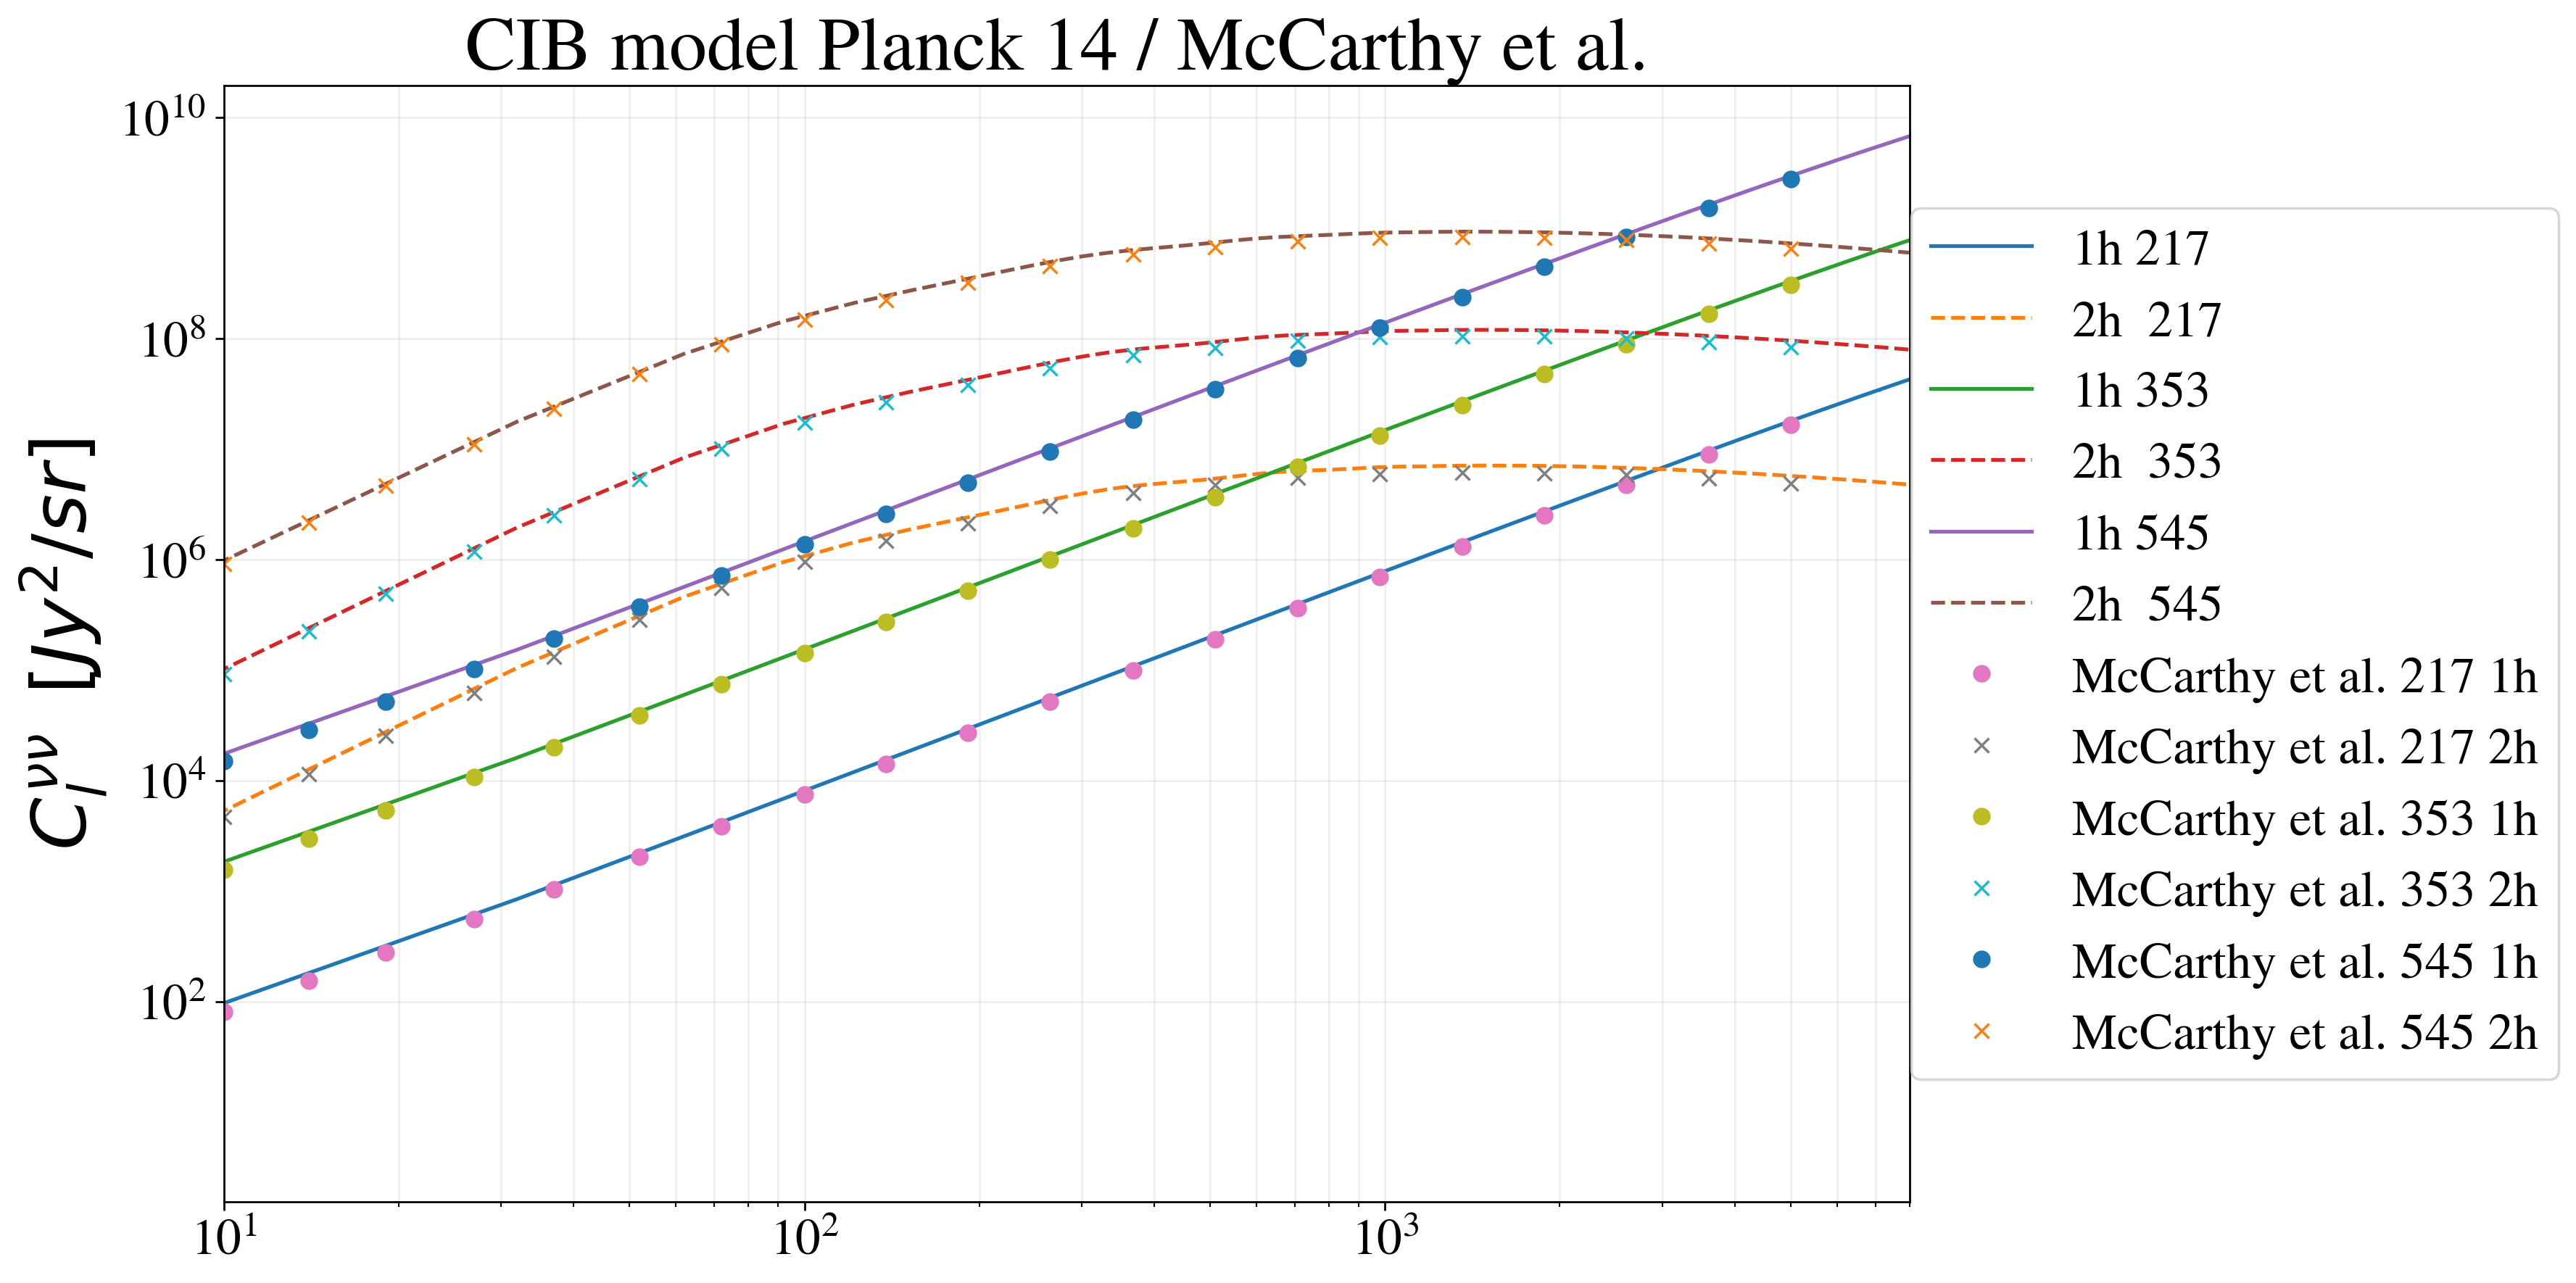

In [52]:
plt.figure(figsize=(12,8), dpi=250)
plt.ylabel(r"$C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.title('CIB model Planck 14 / McCarthy et al. ', fontsize=30)


for (i,nu) in enumerate(nu_list):
    #CIB fiona
    cib_1h = np.asarray(cib[str(nu)+'x'+str(nu)]['1h']) 
    cib_2h = np.asarray(cib[str(nu)+'x'+str(nu)]['2h'])
    plt.plot(ell_cib, cib_1h, "-", label=r'1h %.1i'%(nu))
    plt.plot(ell_cib, cib_2h, "--", label=r'2h  %.1i'%(nu))
    
plt.plot(ell_MM20_217, cib_1h_MM20_217,"o", label = "McCarthy et al. 217 1h")
plt.plot(ell_MM20_217, cib_2h_MM20_217,"x", label = "McCarthy et al. 217 2h")
plt.plot(ell_MM20_353, cib_1h_MM20_353,"o", label = "McCarthy et al. 353 1h")
plt.plot(ell_MM20_353, cib_2h_MM20_353,"x", label = "McCarthy et al. 353 2h")
plt.plot(ell_MM20_545, cib_1h_MM20_545,"o", label = "McCarthy et al. 545 1h")
plt.plot(ell_MM20_545, cib_2h_MM20_545,"x", label = "McCarthy et al. 545 2h")
   
plt.xlim(1.e1, 8.e3)
#plt.ylim(1e-4,0) 
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)



# Maniyar CIB

In [5]:
Omegam0 = 0.3075
H0 = 67.74
Omegab = 0.0486
Omegac = 0.2589
Omegac + Omegab
omega_b = Omegab*(H0/100.)**2
omega_c = Omegac*(H0/100.)**2

In [6]:
Omegab

0.0486

In [7]:
hparam = H0/100.

In [8]:
maniyar_cosmo = {
'omega_b': omega_b,
'omega_cdm':  omega_c,
'h': H0/100.,
# 'tau_reio': 0.0561,
'ln10^{10}A_s': 3.048,
'n_s': 0.9665,
# 'sigma8':0.830,
'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.0    
}

In [9]:
0.134*np.log(10.)

0.3085464024612022

In [8]:
1.24833636e+00**2

1.5583436676980493

In [10]:
%%time 
M = Class()
M.set({'output':'dndlnM,cib_cib_1h,cib_cib_2h,mPk'})
# M.set({'output':'cib_cib_1h'})
# M.set(common_settings)
M.set(maniyar_cosmo)
# M.set(websky_cib_params)
M.set({
    
'mass function' : 'T08M200c',
'use_maniyar_cib_model':1,
    
'maniyar_cib_etamax' : 5.12572945e-01,#0.42,

'maniyar_cib_zc' : 1.5,
'maniyar_cib_tau' : 8.25475287e-01,#1.17,
'maniyar_cib_fsub' : 0.134*np.log(10.),
'Most efficient halo mass in Msun' : 5.34372069e+12,#10.**12.94,
'Size of of halo masses sourcing CIB emission' :  1.24833636e+00**2,#1.75**2.,
#for the monopole computation:
'freq_min': 9e1,
'freq_max': 8e2,
'dlogfreq' : 0.1,
    
'concentration parameter':'D08',
    
    

# 'Redshift evolution of dust temperature' :  0.2,
# 'Dust temperature today in Kelvins' : 20.7,
# 'Emissivity index of sed' : 1.6,
# 'Power law index of SED at high frequency' : 1.7, # not given in WebSky paper, actually not relevant since we dont use high freqs in websky.
# 'Redshift evolution of L − M normalisation' : 1.28, # try 2.4 see slack. 
# 'Most efficient halo mass in Msun' : 10.**12.3,
# 'Normalisation of L − M relation in [Jy MPc2/Msun]' : 1e-7,  # not given in WebSky paper
# 'Size of of halo masses sourcing CIB emission' : 0.3,
# 'z_plateau_cib' : 2.,

# M_min_HOD is the threshold above which nc = 1:
# 'M_min_HOD' : 10.**10.1, # not used here
'use_nc_1_for_all_halos_cib_HOD': 1,

'sub_halo_mass_function' : 'TW10',#'JvdB14',
'M_min_subhalo_in_Msun' : 1e5, # 1e5 see https://github.com/abhimaniyar/halomodel_cib_tsz_cibxtsz/blob/master/Cell_cib.py
'use_redshift_dependent_M_min': 0,
#'full_path_to_redshift_dependent_M_min':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/websky_halo_mass_completion_z_Mmin_in_Msun_over_h.txt',
'M_min' : 1e7,#mabhi.min()*maniyar_cosmo['h'], # not used
'M_max' : 1e16,#mabhi.max()*maniyar_cosmo['h'],
'z_min' : 0.012,
'z_max' : 10.21,
'ell_min': 10.,
'ell_max':5e4,
'dlogell':0.6,


'ndim_redshifts': 210,
'ndim_masses':100,
# table 1 of https://arxiv.org/pdf/1309.0382.pdf
#1: freq GHz 2: Flux cut mJy
# 100 - 400
# 143 - 350
# 217 - 225
# 353 - 315
# 545 - 350
# 857 - 710
# 3000  - 1000
#cib_Snu_1 = 315.
#cib_Snu_2 = 315.
#'cib_Snu_cutoff_list [mJy]':'315',
'has_cib_flux_cut': 0,
'hm_consistency':0,
    
# "P_k_max_1/Mpc": 50.,
# 'k_max_for_pk_class_sz':50.
})

M.set({
       'cib_frequency_list_num' : 1,
       'cib_frequency_list_in_GHz' : '545',  
      })
M.compute()

CPU times: user 1min 13s, sys: 241 ms, total: 1min 13s
Wall time: 9.25 s


In [11]:
# the fit file was written with:
from astropy.io import fits

In [12]:
hdulist = fits.open('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cibpowerspectra_1h_2h_1hplus2h_Planck.fits')


In [13]:
cl1h = hdulist[0].data
cl2h = hdulist[1].data
cl1p2h = hdulist[2].data
labhi = hdulist[3].data
zabhi = hdulist[4].data
mabhi = hdulist[5].data

In [14]:
# "%.5e"%(mabhi.max()*maniyar_cosmo['h'])

In [15]:
cl_cib_cib = M.cl_cib_cib()

In [16]:
1.068**2

1.140624

In [17]:
Planck_cib_dict = {'name': 'Planck',
          'do_cib': 1, 'do_tsz': 1, 'do_cibxtsz': 1,
          'freq_cib': [100., 143., 217., 353., 545., 857.],
          'cc': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'cc_cibmean': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'freq_cibmean': np.array([100., 143., 217., 353., 545., 857.]),
          'fc': np.ones(7),
          }

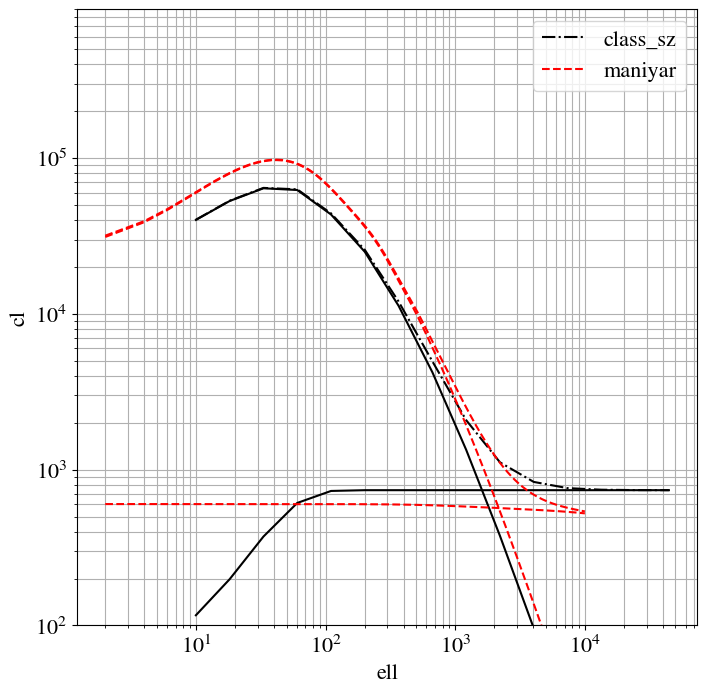

In [20]:
freqs = '545'
idfreqabh = 4
faccib = 1.#Planck_cib_dict['cc'][idfreqabh]**2
fig, (ax1) = plt.subplots(1,1,figsize=(8,8))
l = np.asarray(cl_cib_cib[freqs+'x'+freqs]['ell'])

ax1.plot(cl_cib_cib[freqs+'x'+freqs]['ell'],cl_cib_cib[freqs+'x'+freqs]['1h']/l_to_dl(l)*faccib,c='k')
ax1.plot(cl_cib_cib[freqs+'x'+freqs]['ell'],cl_cib_cib[freqs+'x'+freqs]['2h']/l_to_dl(l)*faccib,c='k')
ax1.plot(l,cl_cib_cib[freqs+'x'+freqs]['1h']/l_to_dl(l)*faccib+cl_cib_cib[freqs+'x'+freqs]['2h']/l_to_dl(l)*faccib,ls='-.',c='k',label='class_sz')
ax1.plot(labhi,cl1h[idfreqabh,idfreqabh],c='r',ls='--')
ax1.plot(labhi,cl2h[idfreqabh,idfreqabh],c='r',ls='--')
ax1.plot(labhi,cl1h[idfreqabh,idfreqabh]+cl2h[idfreqabh,idfreqabh],c='r',ls='--',label='maniyar')
plt.loglog()
plt.xlabel('ell')
plt.ylabel('cl')
plt.legend()
plt.ylim(1e2,9e5)
plt.grid(which = 'both')

In [21]:
from numpy import log
log(10)

2.302585092994046

In [38]:
redshiftsabhi = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/halomodel_cib_tsz_cibxtsz/data_files/redshifts.txt',unpack=True)
redshiftsabhi[1]

0.023

In [72]:
redshiftsabhi[0]

0.012

In [41]:
ll = [str(x) for x in range(1, 211)]
# for i in range(len(redshiftsabhi)):
#     print(ll[209-i])

In [44]:
ll[209-1]

'209'

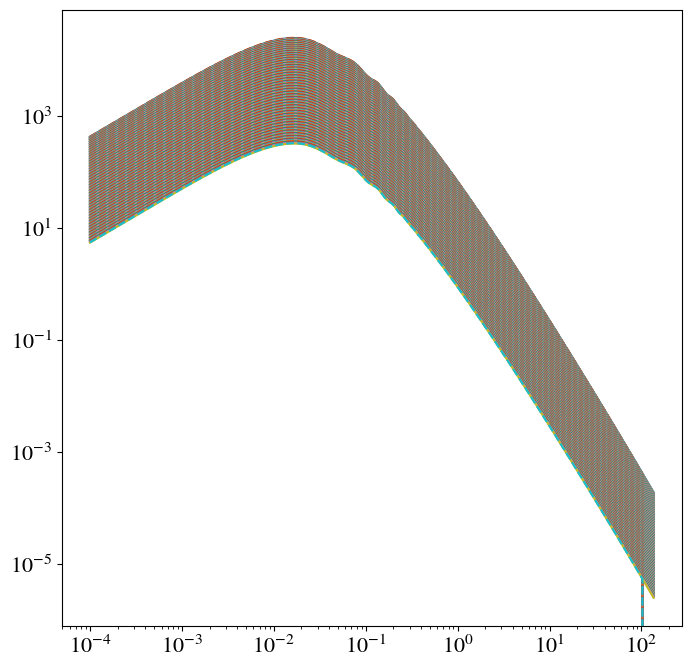

In [58]:
for iz in range(len(redshiftsabhi)):
    # iz = 0
    zp = redshiftsabhi[iz]
    # print('zp',zp)
    ipk = ll[209-iz]
    # print('ipk',ipk)
    # kabhi,pkabhi = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/test_highk_lin_matterpower_209_fromabhi_zt_z0p023.dat',unpack=True)

    kabhi,pkabhi = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/halomodel_cib_tsz_cibxtsz/data_files/matter_power_spectra/test_highk_lin_matterpower_'+str(ipk)+'.dat',unpack=True)
    karr = kabhi*maniyar_cosmo['h']
    pkarr = np.vectorize(M.pk_lin)(karr,zp)*maniyar_cosmo['h']**3
    np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/halomodel_cib_tsz_cibxtsz/data_files/matter_power_spectra/test_class_sz_highk_lin_matterpower_'+str(ipk)+'.dat',np.c_[kabhi,pkabhi])
    plt.plot(kabhi,pkabhi)
    plt.plot(kabhi,pkarr,ls='--')
    plt.loglog()

(-2.0, 2.0)

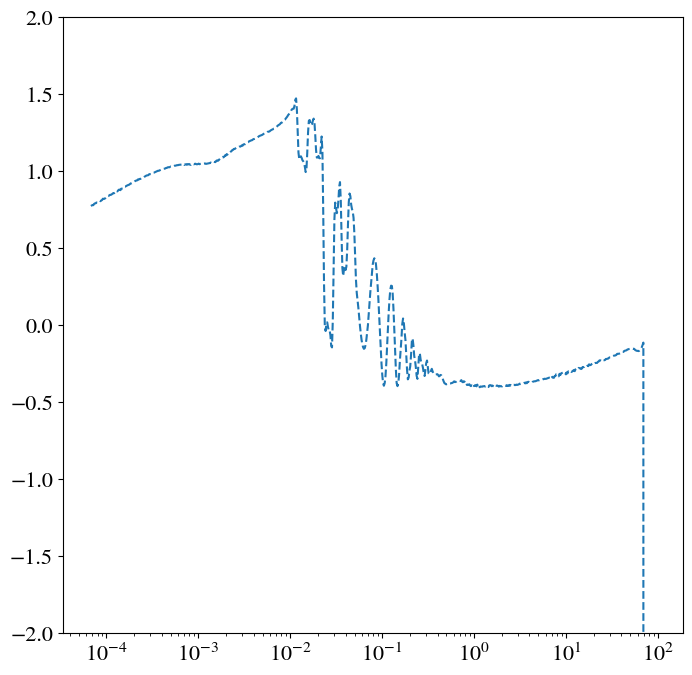

In [57]:
# plt.plot(karr,pkabhi)
plt.plot(karr,(pkarr/pkabhi-1.)*100.,ls='--')
plt.xscale('log')
plt.ylim(-2.,2.)

In [22]:
mabhi,dnabhi = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/dn_dlogm_forBoris.txt',unpack=True)

In [23]:
zp = 1.
dndlogm_class_sz = np.vectorize(M.get_dndlnM_at_z_and_M)(zp,mabhi*hparam)*np.log(10.)*hparam**3

In [24]:
# sigma8param = 
# M.get_current_derived_parameters(['Neff'])['Neff']

In [25]:
import pyccl as ccl
# cosmology = {
# 'h' : 0.6774,
# 'Omega_b' : 0.04860,
# 'Omega_cdm' : 0.315-0.04860,
# # 'A_s': 2e-9,
# 'sigma8':0.831,
# 'n_s' : 0.9667,
# # this takes ages:
# # 'N_ncdm': 1,
# # 'N_ur': 2.0328,
# # 'm_ncdm': 0.0
# }
cosmo = ccl.Cosmology(
    Omega_c=Omegac,
    Omega_b=Omegab,
    h=hparam,
    # A_s = cosmology['A_s'],
    sigma8 = M.get_current_derived_parameters(['sigma8'])['sigma8'],
    n_s=maniyar_cosmo['n_s'],
    m_nu=0,
    m_nu_type='normal',
    Neff=M.get_current_derived_parameters(['Neff'])['Neff'],
    transfer_function='boltzmann_class',
                     )
hmd_200c = ccl.halos.MassDef200c()
hmfs = ccl.halos.MassFuncTinker08(cosmo,mass_def=hmd_200c)
nm = hmfs.get_mass_function(cosmo, mabhi, 1./(1.+zp))

cosmo.cosmo.spline_params.K_MAX_SPLINE 50.0
cosmo.cosmo.spline_params.A_SPLINE_MINLOG_PK 99.0


(1e-09, 1000.0)

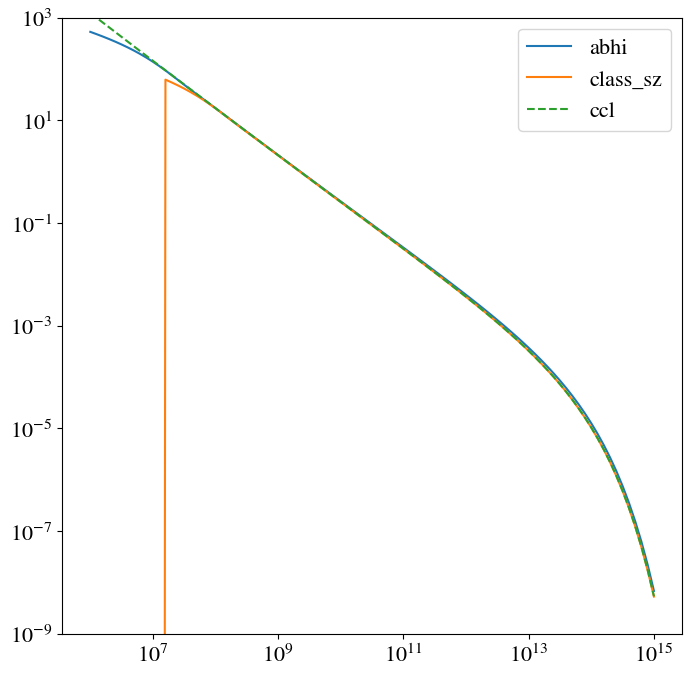

In [26]:
plt.plot(mabhi,dnabhi,label='abhi')
plt.plot(mabhi,dndlogm_class_sz,label='class_sz')
plt.plot(mabhi,nm,label='ccl',ls='--')
plt.loglog()
plt.legend()
plt.ylim(1e-9,1e3)

In [60]:
from astropy.cosmology import Planck15

In [61]:
cosmo = Planck15

In [62]:
cosmo.Om(0.3)

0.4931534665534234

In [63]:
1./M.get_delta_mean_from_delta_crit_at_z(1.,0.3)

0.4937541492313648

In [64]:
import scipy
snuaddr = '/Users/boris/Work/CLASS-SZ/SO-SZ/halomodel_cib_tsz_cibxtsz/data_files/filtered_snu_planck.fits'
hdulist = fits.open(snuaddr)
redshifts = hdulist[1].data
snu_eff = hdulist[0].data  # in Jy/Lsun
hdulist.close()
fsnu_eff = scipy.interpolate.interp1d(redshifts, snu_eff, kind='linear',
                    bounds_error=False, fill_value="extrapolate")


In [65]:
zpp = 4.3
snu = fsnu_eff(zpp)

In [66]:
snu[4]

1.3780228045342125e-15

In [67]:
M.get_cib_Snu_z_and_nu(zpp,545.)

1.378003247092126e-15

In [68]:
zp = 9.
f_b = cosmo.Ob(zp)/cosmo.Om(zp)

In [69]:
f_b

0.15804878048780485

In [70]:
M.get_f_b()

0.15804877723733274

In [71]:
1.24833636e+00**2

1.5583436676980493

In [ ]:
M.get_nu_at_z_and_m()

In [ ]:

M.get_first_order_bias_at_z_and_nu(

In [74]:
np.ones((5, 5, 5))

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [83]:
marr = np.geomspace(1e14,1e15,10)
rd = np.vectorize(M.get_r_delta_of_m_delta_at_z)(200.,marr,1.)
rd
karr = np.geomspace(1e-2,1e1,30)
# np.vectorize(M.get_truncated_nfw_profile_at_z_k_rd_cd_xout)(1.,karr,rd,5.,1.)

In [85]:
# for ik,k in enumerate(karr):
#     print(ik,k)

In [86]:
0.13*log(10)

0.299336062089226